###import

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
df=pd.read_csv('dataset.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLevel                  

In [5]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,902.000000,902.000000,902.000000,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,36.832594,797.782705,9.433481,2.952328,1.0,1014.508869,2.688470,67.124169,2.721729,2.021064,...,2.694013,80.0,0.804878,11.043237,2.815965,2.743902,6.794900,4.144124,2.144124,3.936807
std,9.306933,405.292650,8.248331,1.041295,0.0,608.153731,1.103652,20.558087,0.710750,1.093112,...,1.083397,0.0,0.862113,7.810982,1.309680,0.708159,6.089151,3.647824,3.108697,3.480307
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,459.750000,2.000000,2.000000,1.0,477.250000,2.000000,49.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,801.500000,7.000000,3.000000,1.0,1001.500000,3.000000,67.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1156.250000,15.000000,4.000000,1.0,1553.750000,4.000000,85.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Missing values per column:")
print(missing_values)


Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

Distribution of target variable:
Attrition
No     713
Yes    189
Name: count, dtype: int64


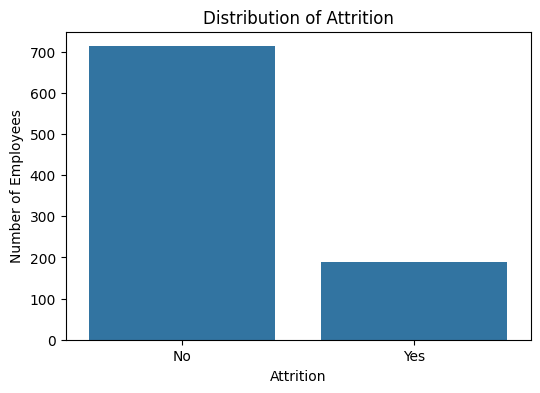

In [8]:
# Explore the target variable 'Attrition'
target_counts = df['Attrition'].value_counts()

# Print the distribution of the target variable
print("Distribution of target variable:")
print(target_counts)

# Visualize the target variable distribution using a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()


In [9]:
# Measure and print the number of unique values for each column
unique_values = df.nunique()

# Print the number of unique values for each column
print("Number of unique values per column:")
print(unique_values)

# Identify columns with less than 2 unique values
columns_to_remove = unique_values[unique_values < 2].index

# Remove columns with less than 2 unique values
df.drop(columns_to_remove, axis=1, inplace=True)

# Print the remaining columns
print("\nColumns after removing those with less than 2 unique values:")
print(df.columns)


Number of unique values per column:
Age                          42
Attrition                     2
BusinessTravel                3
DailyRate                   653
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeNumber              902
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome               853
MonthlyRate                 888
NumCompaniesWorked           10
Over18                        1
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
RelationshipSatisfaction      4
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
Work

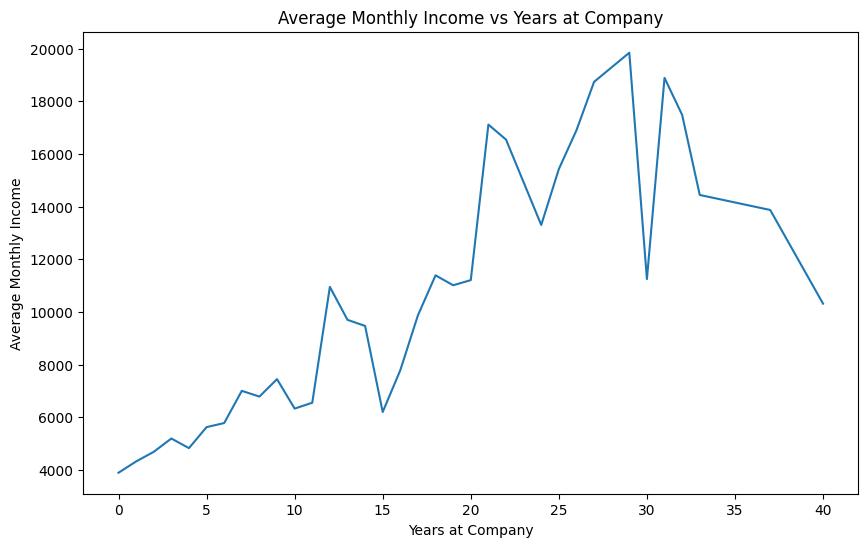

Department with the highest average income: Sales (Average Income: 6817.39)
Department with the lowest average income: Research & Development (Average Income: 6073.64)


In [10]:
# Line plot of average MonthlyIncome against YearsAtCompany
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=df, errorbar=None)
plt.title('Average Monthly Income vs Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Monthly Income')
plt.show()

# Group by department and calculate the mean of MonthlyIncome
department_income = df.groupby('Department')['MonthlyIncome'].mean()

# Find department with the highest average income
highest_income_department = department_income.idxmax()
highest_income_value = department_income.max()

# Find department with the lowest average income
lowest_income_department = department_income.idxmin()
lowest_income_value = department_income.min()


# Print results
print(f"Department with the highest average income: {highest_income_department} (Average Income: {highest_income_value:.2f})")
print(f"Department with the lowest average income: {lowest_income_department} (Average Income: {lowest_income_value:.2f})")


Data Preprocessing


In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the dataframe to store the encoded values
encoded_df = df.copy()

# Label encode each categorical column
for col in categorical_cols:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Display the first few rows of the encoded dataframe
print("Encoded Dataframe:")
print(encoded_df.head())


Encoded Dataframe:
   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   29          0               2        592           1                 7   
1   34          0               2       1326           2                 3   
2   27          0               2        954           2                 9   
3   32          0               2        929           2                10   
4   50          0               1       1234           1                20   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          3               1            1883                        4  ...   
1          3               4            1478                        4  ...   
2          3               2            1965                        4  ...   
3          3               2             722                        4  ...   
4          5               3            1606                        2  ...   

   PerformanceRating  RelationshipSatisfact

In [12]:
# Split into features and target variable
X = encoded_df.drop(columns=['Attrition'])
y = encoded_df['Attrition']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the resulting datasets to verify
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_scaled: (631, 31)
Shape of X_test_scaled: (271, 31)
Shape of y_train: (631,)
Shape of y_test: (271,)


K-Nearest Neighbors (KNN) Model



In [14]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test set accuracy: 0.8007380073800738
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       216
           1       0.53      0.18      0.27        55

    accuracy                           0.80       271
   macro avg       0.67      0.57      0.58       271
weighted avg       0.76      0.80      0.76       271

Confusion Matrix:
 [[207   9]
 [ 45  10]]


In [15]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
results = {}

for k in k_values:
    # Initialize KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training data
    knn.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy
    print(f"k={k}, Accuracy: {accuracy}")


# Find the best k value
best_k = max(results, key=results.get)
best_accuracy = results[best_k]

print(f"\nBest k value: {best_k} with accuracy: {best_accuracy}")

# Optionally, you can train the final model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)


k=1, Accuracy: 0.8081180811808119
k=3, Accuracy: 0.8007380073800738
k=5, Accuracy: 0.8007380073800738
k=7, Accuracy: 0.8265682656826568
k=9, Accuracy: 0.8302583025830258
k=11, Accuracy: 0.8154981549815498
k=13, Accuracy: 0.8265682656826568
k=15, Accuracy: 0.8118081180811808

Best k value: 9 with accuracy: 0.8302583025830258


KNeighborsClassifier(n_neighbors=9)

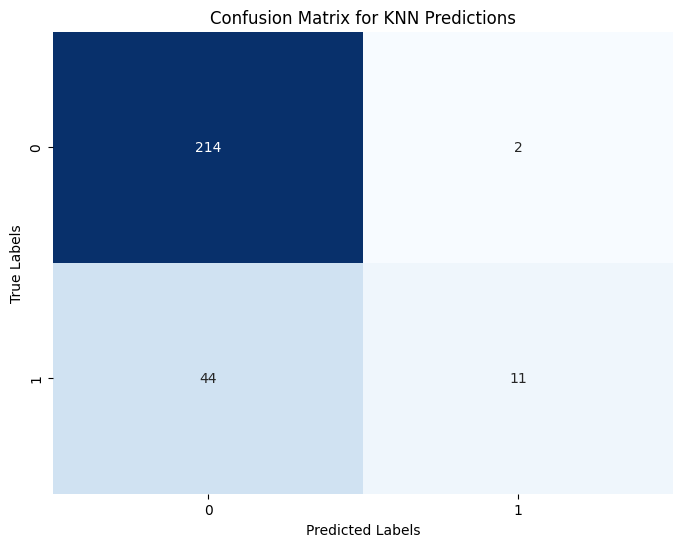

In [16]:
# Fit the final model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for KNN Predictions')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


###Evaluation

In this part, we are going to evaluate our model's performance on another set of unseen data. Load test.csv (this data is already encoded), use our best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.



In [17]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [20]:
# Load test.csv
eval_df= pd.read_csv('test.csv')
# Identify categorical columns in the eval_df
categorical_cols_eval = eval_df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the dataframe to store the encoded values
encoded_eval_df = eval_df.copy()

# Label encode each categorical column
for col in categorical_cols_eval:
    encoded_eval_df[col] = label_encoder.fit_transform(encoded_eval_df[col])

# Scale the features using the fitted scaler
X_eval_scaled = scaler.transform(encoded_eval_df)

# Predict using the best model
y_pred_eval = best_knn.predict(X_eval_scaled)

# Print the first 10 predictions
print("First 10 predictions on the evaluation set:", y_pred_eval[:10])


First 10 predictions on the evaluation set: [0 0 0 0 0 0 0 0 0 0]


In [21]:
# Create a DataFrame for the results
result_df = pd.DataFrame()

# Add the predicted values to the DataFrame
result_df['target'] = pd.Series(y_pred_eval)

# Save the results to a CSV file
result_df.to_csv('result.csv', index=False)

# Print a confirmation message
print("Results saved to 'result.csv'")


Results saved to 'result.csv'


Random Forest Model


In [22]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [10, 20, None],
                 'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV for Random Forest
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
rf_cv.fit(X_train_scaled, y_train)

# Get the best Random Forest model
best_rf = rf_cv.best_estimator_

# Make predictions on the test set using the best model
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.8339483394833949
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       216
           1       0.78      0.25      0.38        55

    accuracy                           0.83       271
   macro avg       0.81      0.62      0.64       271
weighted avg       0.83      0.83      0.80       271



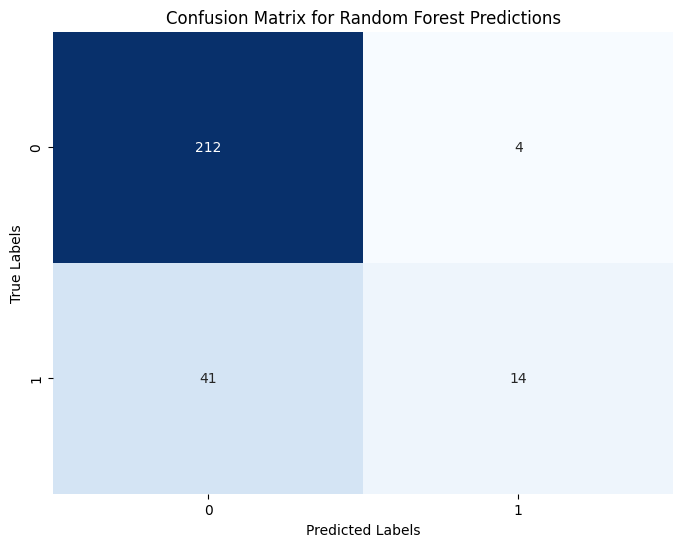

In [23]:
# Calculate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Random Forest Predictions')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


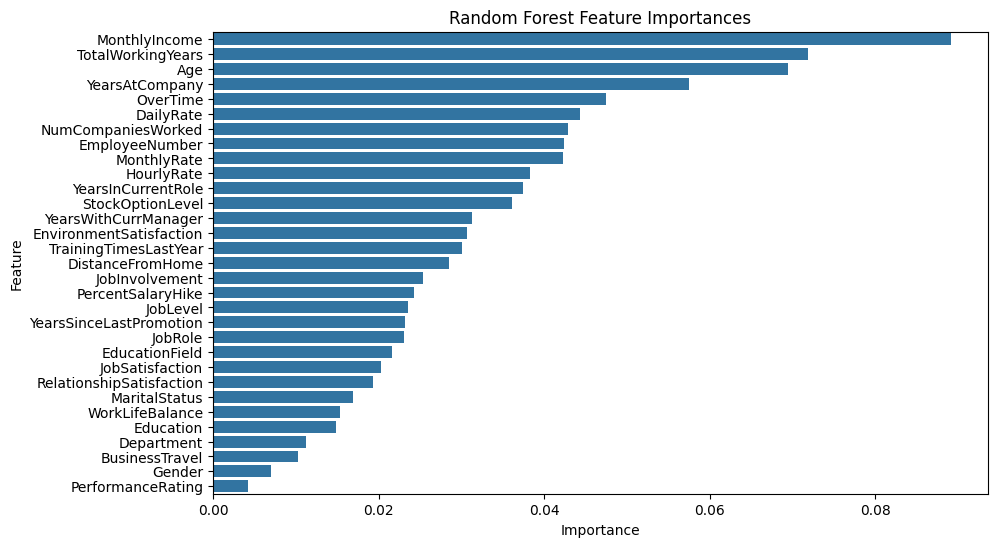

In [24]:
# Get the feature importances from the trained Random Forest model
importances = best_rf.feature_importances_

# Sort the indices of the importance values in descending order
indices = np.argsort(importances)[::-1]

# Create a DataFrame that contains the feature names and their corresponding importance scores
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names[indices], 'Importance': importances[indices]})

# Create a bar plot to visualize feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Bagging with KNN


In [25]:
# Initialize BaggingClassifier with KNeighborsClassifier as the base estimator
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=best_k), n_estimators=50, random_state=42)

# Fit the BaggingClassifier on the scaled training data
bagging_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set using the trained Bagging model
y_pred_bagging_knn = bagging_knn.predict(X_test_scaled)

# Evaluate the Bagging KNN model
accuracy_bagging_knn = accuracy_score(y_test, y_pred_bagging_knn)
print(f"Bagging KNN Model Accuracy: {accuracy_bagging_knn}")
print("Bagging KNN Classification Report:\n", classification_report(y_test, y_pred_bagging_knn))


Bagging KNN Model Accuracy: 0.8265682656826568
Bagging KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       216
           1       0.90      0.16      0.28        55

    accuracy                           0.83       271
   macro avg       0.86      0.58      0.59       271
weighted avg       0.84      0.83      0.77       271



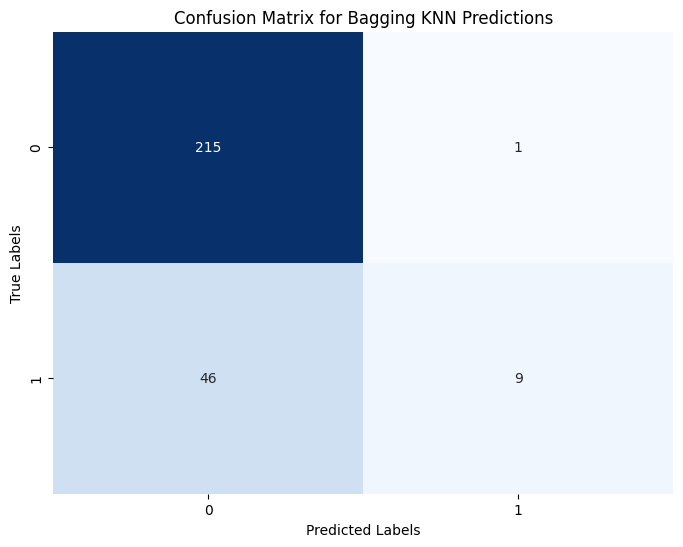

In [26]:
# Calculate the confusion matrix for Bagging KNN predictions
cm_bagging_knn = confusion_matrix(y_test, y_pred_bagging_knn)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Bagging KNN Predictions')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


AdaBoost Model


In [27]:
# Initialize AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_ada = {'n_estimators': [50, 100, 150],
                 'learning_rate': [0.01, 0.1, 1.0]}

# Initialize GridSearchCV for AdaBoost
adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
adaboost_cv.fit(X_train_scaled, y_train)

# Get the best AdaBoost model
best_adaboost = adaboost_cv.best_estimator_

# Make predictions on the test set using the best model
y_pred_adaboost = best_adaboost.predict(X_test_scaled)

# Evaluate the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Model Accuracy: {accuracy_adaboost}")
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_adaboost))


AdaBoost Model Accuracy: 0.8487084870848709
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       216
           1       0.71      0.44      0.54        55

    accuracy                           0.85       271
   macro avg       0.79      0.70      0.72       271
weighted avg       0.84      0.85      0.83       271



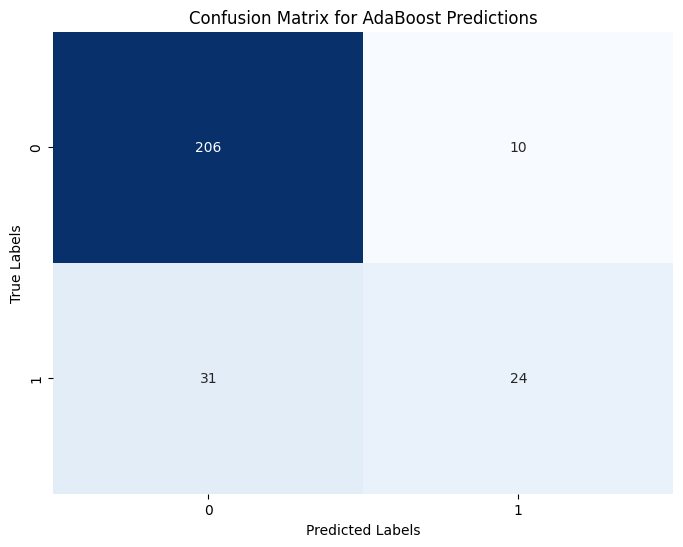

In [28]:
# Calculate the confusion matrix for AdaBoost predictions
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for AdaBoost Predictions')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Model Comparison


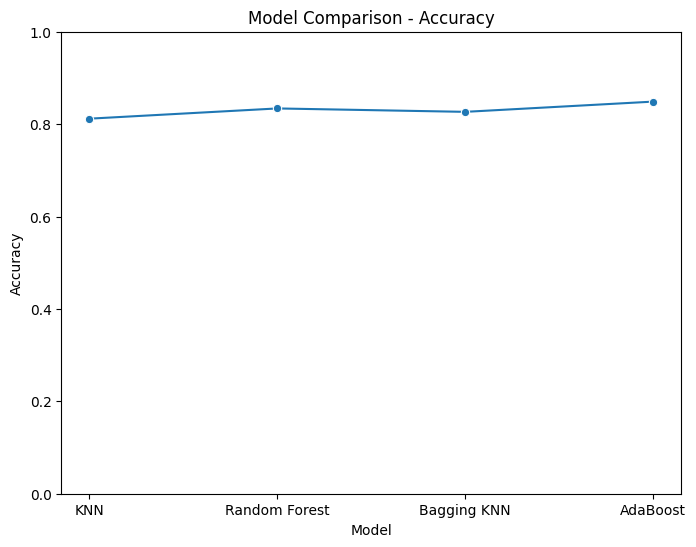

In [29]:
# Compare model accuracies for KNN, Random Forest, Bagging KNN, and AdaBoost
model_names = ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost']
accuracies = [accuracy, accuracy_rf, accuracy_bagging_knn, accuracy_adaboost]

# Create a DataFrame with model names and their respective accuracies
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Visualize the model comparison using a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='Model', y='Accuracy', data=accuracy_df, marker='o')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better comparison
plt.show()
